# Solution: Data handling

In [5]:
from torchvision import transforms
import torch
import numpy as np
from torch.utils.data import DataLoader, Dataset
from pathlib import Path

In [10]:
transformations = transforms.Compose([
    transforms.ToTensor(),
])

num_data = 10000
batch_size = 32

folders = list(Path('../data/quickdraw/').glob('*npy'))

In [11]:
data = np.concatenate([np.load(f)[0:num_data] for f in folders]) #check everything works with tiny set
labels = np.concatenate([[ind for i in range(num_data)] for ind, f in enumerate(folders)]) #check everything works with tiny set

In [13]:
class Drawings(Dataset):
    """Dataset class for quickdraw. Inputs are arrays of linearized 
    images and arrays of labels."""
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = torch.LongTensor(targets)
        self.transform = transform

    def __getitem__(self, index):
        x = self.data[index]
        x = np.reshape(x, (28,28))
        y = self.targets[index]

        if self.transform:
            x = self.transform(x)

        return x, y

    def __len__(self):
        return len(self.targets)

In [14]:
drawing_data = Drawings(data, labels, transformations)

In [20]:
test_size = int(len(drawing_data)*0.8)
valid_size = len(drawing_data) - test_size

In [21]:
from torch.utils.data import random_split

train_data, valid_data = random_split(drawing_data, [test_size, valid_size])

In [26]:
train_loader = DataLoader(train_data,
                          shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data,
                          shuffle=True, batch_size=batch_size)

In [27]:
im, lab = next(iter(train_loader))

In [28]:
im1, lab1 = next(iter(valid_loader))

In [29]:
import matplotlib.pyplot as plt

In [30]:
im.shape

torch.Size([32, 1, 28, 28])

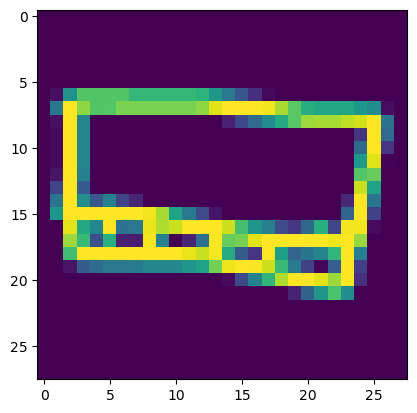

In [43]:
plt.imshow(im1[6,0])